<a href="https://colab.research.google.com/github/sanjsvk/covid-analysis/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [25]:
line_list_data = pd.read_csv('/content/drive/My Drive/archive/COVID19_line_list_data.csv')
line_list_data = line_list_data.drop(['Unnamed: 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'], axis =1)
open_line_list = pd.read_csv('/content/drive/My Drive/archive/COVID19_open_line_list.csv')
open_line_list = open_line_list.drop(['Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44'],axis = 1)
covid_data = pd.read_csv('/content/drive/My Drive/archive/covid_19_data.csv')

In [26]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Using data-set - covid_data

Contains data from 22nd Jan, 2020 to 23rd Sept, *2020*



In [3]:
print("Total data length - {} \n".format(len(covid_data)))
covid_data.dtypes

Total data length - 116805 



SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [4]:
covid_data.describe()

,SNo,Confirmed,Deaths,Recovered
count,116805.000000,1.168050e+05,116805.000000,1.168050e+05
mean,58403.000000,1.908217e+04,777.745473,1.117002e+04
std,33718.843434,5.825465e+04,2859.184068,6.258701e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,29202.000000,2.450000e+02,3.000000,4.000000e+00
50%,58403.000000,2.148000e+03,42.000000,4.260000e+02
75%,87604.000000,1.037400e+04,331.000000,3.829000e+03
max,116805.000000,1.242770e+06,42072.000000,2.670256e+06


Null Values

In [31]:
print("Missing values")
print(covid_data.isnull().sum())
print("\nProvince/State has {}% missing values".format(np.round((count[2]/len(covid_data))*100,2)))

Missing values
SNo                    0
ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

Province/State has 30.27% missing values


Cases per day

                  Confirmed    Deaths   Recovered
ObservationDate                                  
01/22/2020            555.0      17.0        28.0
01/23/2020            653.0      18.0        30.0
01/24/2020            941.0      26.0        36.0
01/25/2020           1438.0      42.0        39.0
01/26/2020           2118.0      56.0        52.0
...                     ...       ...         ...
09/19/2020       30688150.0  955866.0  20922189.0
09/20/2020       30935011.0  959565.0  21159459.0
09/21/2020       31245797.0  963693.0  21394593.0
09/22/2020       31517087.0  969578.0  21624434.0
09/23/2020       31779835.0  975104.0  21890442.0

[246 rows x 3 columns]


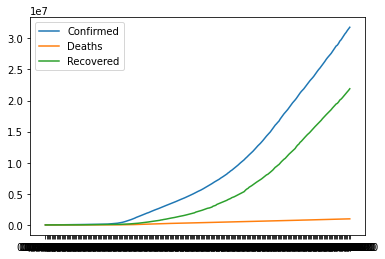

In [6]:
per_day = covid_data[['ObservationDate','Confirmed','Deaths','Recovered']]
numbers = per_day.groupby('ObservationDate').sum()
print(numbers)
plt.plot(covid_data['ObservationDate'].unique(),numbers['Confirmed'])
plt.plot(covid_data['ObservationDate'].unique(),numbers['Deaths'])
plt.plot(covid_data['ObservationDate'].unique(),numbers['Recovered'])
plt.legend(numbers)
plt.show()

warnings.filterwarnings("ignore")

Cases aggregated by country

In [7]:
country_wise = covid_data.groupby('Country/Region').sum()
country_wise = country_wise.drop('SNo',axis =1)
country_wise = country_wise.sort_values('Confirmed', ascending=False)
country_wise = country_wise.reset_index()

country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered
0,US,557588267.0,21189260.0,174911575.0
1,Brazil,301632363.0,10657805.0,230105907.0
2,India,238342983.0,4630497.0,173210742.0
3,Russia,101499236.0,1582441.0,70205110.0
4,Peru,53724353.0,2184904.0,35921289.0


Appending rate of increase to the data

In [8]:
Ratio_of_Cases = []
Death_rate = []
Recovery_rate = []

for i in range(len(country_wise)):
  Ratio_of_Cases.append(np.round(country_wise['Confirmed'][i]/country_wise['Confirmed'].sum()*100,2))
  Death_rate.append(np.round(country_wise['Deaths'][i]/country_wise['Confirmed'][i]*100,2))
  Recovery_rate.append(np.round(country_wise['Recovered'][i]/country_wise['Confirmed'][i]*100,2))

#Add rates to the DataFrame
country_wise['Ratio_of_Cases'] = Ratio_of_Cases
country_wise['Death_rate'] = Death_rate
country_wise['Recovery_rate'] = Recovery_rate
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Ratio_of_Cases,Death_rate,Recovery_rate
0,US,557588267.0,21189260.0,174911575.0,25.02,3.80,31.37
1,Brazil,301632363.0,10657805.0,230105907.0,13.53,3.53,76.29
2,India,238342983.0,4630497.0,173210742.0,10.69,1.94,72.67
3,Russia,101499236.0,1582441.0,70205110.0,4.55,1.56,69.17
4,Peru,53724353.0,2184904.0,35921289.0,2.41,4.07,66.86


#Top 5 countries

Top 5 countries by cases registered

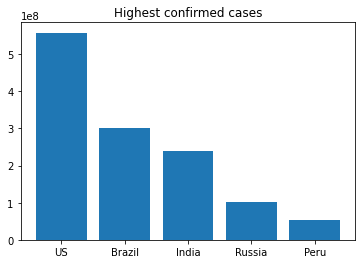

In [9]:
top_confirmed = country_wise.sort_values('Confirmed', ascending=False).head()
x = top_confirmed['Country/Region']
y = top_confirmed['Confirmed']
plt.bar(x,y)
plt.title('Highest confirmed cases')

warnings.filterwarnings("ignore")

Top 5 countries by death rate

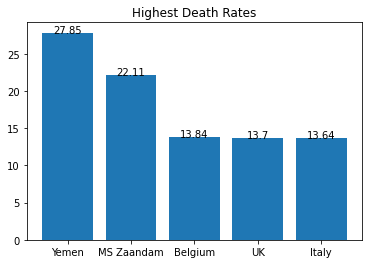

In [10]:
top_deathrate = country_wise.sort_values('Death_rate', ascending=False).head()
x = top_deathrate['Country/Region']
y = top_deathrate['Death_rate']
plt.bar(x,y)
for a,b in zip(x, y): 
    plt.text(a, b, str(b),horizontalalignment='center')
plt.title('Highest Death Rates')

warnings.filterwarnings("ignore")

Top 5 countries by recovery rate

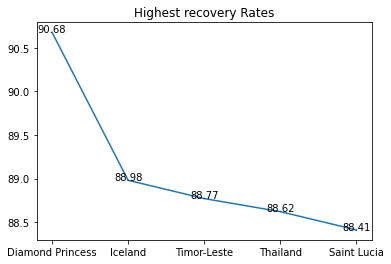

In [11]:
top_recoveryrate = country_wise.sort_values('Recovery_rate', ascending=False).head()
x = top_recoveryrate['Country/Region']
y = top_recoveryrate['Recovery_rate']
plt.plot(x,y)
for a,b in zip(x, y): 
    plt.text(a, b, str(b),horizontalalignment='center')
plt.title('Highest recovery Rates')

warnings.filterwarnings("ignore")

---

Using line_list_data

In [74]:
#line_list_data.isnull().sum()

In [75]:
line_list_data.head(3)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...


###What percentage of people who tested positive were from Wuhan or were visiting Wuhan?

In [49]:
#Fill NA values in 'from Wuhan' column
print(len(line_list_data))
print(line_list_data['from Wuhan'].unique())
print(line_list_data['from Wuhan'].isnull().sum())
print(line_list_data['from Wuhan'].sum())
#Since sum is 156, we know there are 156 values with 1 in 1085 values
#Since majority values are 0, we fill the 4 na values with 0
line_list_data['from Wuhan'] = line_list_data['from Wuhan'].fillna(0)

1085
[ 0.  1. nan]
4
156.0


In [73]:
print("from Wuhan ",int(line_list_data['from Wuhan'].sum()))
print("visiting Wuhan ",line_list_data['visiting Wuhan'].sum())

#common people in both columns
count = 0
for i in range(len(line_list_data)):
  if line_list_data['from Wuhan'][i] == 1 and line_list_data['visiting Wuhan'][i] == 1:
    count +=1
print("Common to both ",count)

print("Percentage of people ",np.round((line_list_data['from Wuhan'].sum() + line_list_data['visiting Wuhan'].sum() - count)/len(line_list_data)*100,2))

from Wuhan  156
visiting Wuhan  192
Common to both  1
Percentage of people  31.98
